In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
amz=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Amazon/Amazon - Movies and TV Ratings.csv")

In [ ]:
amz.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
amz.shape

(4848, 207)

In [ ]:
amz.describe().T

,count,mean,std,min,25%,50%,75%,max
Movie1,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie2,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie3,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Movie4,2.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
Movie5,29.0,4.103448,1.496301,1.0,4.00,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Movie202,6.0,4.333333,1.632993,1.0,5.00,5.0,5.0,5.0
Movie203,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Movie204,8.0,4.375000,1.407886,1.0,4.75,5.0,5.0,5.0
Movie205,35.0,4.628571,0.910259,1.0,5.00,5.0,5.0,5.0


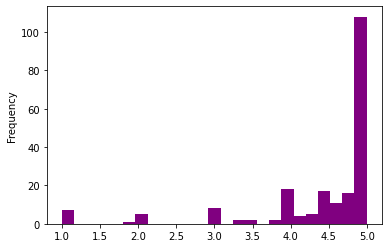

In [ ]:
amz.describe().T['mean'].plot(bins=25,kind='hist',color='purple')

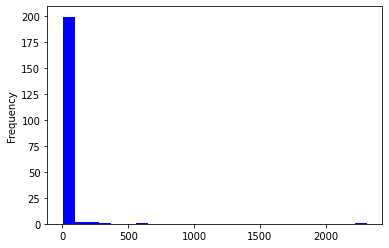

In [ ]:
amz.describe().T['count'].plot(bins=25,kind='hist',color='blue')

In [ ]:
amz.describe().T['count'].sort_values(ascending=False)[:1].to_frame()

,count
Movie127,2313.0


In [ ]:
amz.drop('user_id',axis=1).sum().sort_values(ascending=False)[:1].to_frame()

,0
Movie127,9511.0


In [ ]:
amz.drop('user_id',axis=1).mean()

Movie1      5.000000
Movie2      5.000000
Movie3      2.000000
Movie4      5.000000
Movie5      4.103448
              ...   
Movie202    4.333333
Movie203    3.000000
Movie204    4.375000
Movie205    4.628571
Movie206    4.923077
Length: 206, dtype: float64

In [ ]:
amz.drop('user_id',axis=1).mean().sort_values(ascending=False)[0:5].to_frame()

,0
Movie1,5.0
Movie66,5.0
Movie76,5.0
Movie75,5.0
Movie74,5.0


In [ ]:
amz.describe().T['count'].sort_values(ascending=True)[:5].to_frame()

,count
Movie1,1.0
Movie71,1.0
Movie145,1.0
Movie69,1.0
Movie68,1.0


In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 771 kB 34.4 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626428 sha256=23b95e3ca8a0ef99a7edd00a7b5d10fb17073f836a6727161dd134679c36623b
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
#model building
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise import SVD
from surprise.model_selection import train_test_split

In [ ]:
movie_data=amz.melt(id_vars=amz.columns[0],value_vars=amz.columns[1:],var_name="Movies",value_name="Rating")
movie_data

,user_id,Movies,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,NaN
2,A3LKP6WPMP9UKX,Movie1,NaN
3,AVIY68KEPQ5ZD,Movie1,NaN
4,A1CV1WROP5KTTW,Movie1,NaN
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [ ]:
rd=Reader(rating_scale=(-1,10))
data=Dataset.load_from_df(movie_data.fillna(0),reader=rd)
data

In [ ]:
train_data,test_data=train_test_split(data,test_size=0.20)

In [ ]:
svd=SVD()

In [ ]:
svd.fit(train_data)

In [ ]:
pred=svd.test(test_data)

In [ ]:
accuracy.rmse(pred)

RMSE: 0.2744


0.27438121544621574

In [ ]:
accuracy.mae(pred)

MAE:  0.0406


0.040594130988835624

In [ ]:
u_id='AH3QC2PC1VTGP'
mv='Movie206'
r_id=0.5
svd.predict(u_id,mv,r_ui=r_id,verbose=True)

user: AH3QC2PC1VTGP item: Movie206   r_ui = 0.50   est = -0.01   {'was_impossible': False}


Prediction(uid='AH3QC2PC1VTGP', iid='Movie206', r_ui=0.5, est=-0.011152114090368741, details={'was_impossible': False})

In [ ]:
from surprise.model_selection import cross_validate

In [ ]:
cross_validate(svd,data,measures=['RMSE','MAE'],cv=3,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.2819  0.2816  0.2841  0.2825  0.0011  
MAE (testset)     0.0428  0.0427  0.0424  0.0427  0.0002  
Fit time          10.74   11.11   11.07   10.97   0.17    
Test time         4.28    3.62    3.61    3.84    0.32    


{'test_rmse': array([0.28187158, 0.28159326, 0.28407052]),
 'test_mae': array([0.04282895, 0.04269367, 0.04244072]),
 'fit_time': (10.739688873291016, 11.113481998443604, 11.065742254257202),
 'test_time': (4.284741163253784, 3.620985269546509, 3.608677387237549)}

In [ ]:
def repeat(ml_type,dframe,min_,max_):
    rd = Reader()
    data = Dataset.load_from_df(dframe,reader=rd)
    print(cross_validate(ml_type, data, measures = ['RMSE', 'MAE'], cv = 3, verbose = True))
    print("#"*10)
    u_id = 'AH3QC2PC1VTGP'
    m_id = 'Movie206'
    ra_u = 5.0
    print(ml_type.predict(u_id,mv,r_ui=ra_u,verbose=True))
    print("#"*10)
    print()

In [ ]:
amz= amz.iloc[:3000, :50]
movie_data = amz.melt(id_vars = amz.columns[0],value_vars=amz.columns[1:],var_name="Movies",value_name="Rating")

In [ ]:
repeat(SVD(),movie_data.fillna(0),-1,10)
repeat(SVD(),movie_data.fillna(movie_data.mean()),-1,10)
repeat(SVD(),movie_data.fillna(movie_data.median()),-1,10)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0280  1.0318  1.0276  1.0291  0.0019  
MAE (testset)     1.0121  1.0134  1.0118  1.0124  0.0007  
Fit time          1.47    1.51    1.49    1.49    0.02    
Test time         0.35    0.38    0.81    0.52    0.21    
{'test_rmse': array([1.02800977, 1.03181223, 1.02755632]), 'test_mae': array([1.01210462, 1.01344496, 1.01179288]), 'fit_time': (1.4732296466827393, 1.5124051570892334, 1.4933686256408691), 'test_time': (0.3541398048400879, 0.37821245193481445, 0.8142061233520508)}
##########
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 1.00   {'was_impossible': False}
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 1.00   {'was_impossible': False}
##########



<ipython-input-30-ad849d0a6b64>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  repeat(SVD(),movie_data.fillna(movie_data.mean()),-1,10)


Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0615  0.0550  0.0541  0.0569  0.0033  
MAE (testset)     0.0073  0.0075  0.0078  0.0075  0.0002  
Fit time          1.47    1.49    1.50    1.49    0.01    
Test time         0.41    0.81    0.71    0.65    0.17    
{'test_rmse': array([0.06153163, 0.05495496, 0.05414924]), 'test_mae': array([0.00729915, 0.00751953, 0.00782079]), 'fit_time': (1.4656195640563965, 1.4948670864105225, 1.4979712963104248), 'test_time': (0.41189050674438477, 0.8112943172454834, 0.7143175601959229)}
##########
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 4.54   {'was_impossible': False}
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 4.54   {'was_impossible': False}
##########



<ipython-input-30-ad849d0a6b64>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  repeat(SVD(),movie_data.fillna(movie_data.median()),-1,10)


Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0582  0.0688  0.0592  0.0621  0.0048  
MAE (testset)     0.0048  0.0052  0.0052  0.0051  0.0002  
Fit time          1.48    1.51    1.50    1.50    0.01    
Test time         0.36    0.35    0.75    0.49    0.19    
{'test_rmse': array([0.05817076, 0.06882924, 0.05921304]), 'test_mae': array([0.00482602, 0.00521266, 0.00524605]), 'fit_time': (1.4779119491577148, 1.5118494033813477, 1.5040903091430664), 'test_time': (0.3638904094696045, 0.350048303604126, 0.7520055770874023)}
##########
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 4.92   {'was_impossible': False}
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 4.92   {'was_impossible': False}
##########



In [ ]:
#trying grid search and find optimum hyperparameter value for n_factors
from surprise.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_epochs':[20,30],
             'lr_all':[0.005,0.001],
             'n_factors':[50,100]}

In [ ]:
gs = GridSearchCV(SVD,param_grid,measures=['rmse','mae'],cv=3)
gs.fit(data)

In [ ]:
gs.best_score

{'rmse': 0.2793137246943805, 'mae': 0.041523780715323984}

In [ ]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.2793137246943805
{'n_epochs': 30, 'lr_all': 0.005, 'n_factors': 50}
